# Dashboard de Coyuntura Económica - Equipo 2

Presentan:

* **Cárdenas Gallardo Paula Daniela** – 733720 – Ingeniería y Ciencia de Datos

* **González Álvarez Vidal** – 45468– Ingeniería en Sistemas Computacionales

* **Gutiérrez Estrada Gerardo** – 729878 – Ingeniería Financiera

* **Villa Domínguez Paulo Adrián** – 733773 – Ingeniería y Ciencia de Datos


---
El dashboard de coyuntura económica tiene como propósito mostrar la información más relevante de cuatro diferentes tipos de activos.
 
En primer lugar, los CETES, los cuales, con Certificados de Tesorería de la Federación, se emitieron por primera vez en 1978, y son títulos de crédito, ¿qué significa esto? En pocas palabras le estás prestando dinero al gobierno mexicano por un tiempo determinado. Al invertir en CETES obtendrás un rendimiento fijo, representado por un porcentaje, sin embargo, la realidad es que estas comprando el CETES a un valor menor a su valor nominal de 10 pesos, y recibiendo su valor nominal al vencimiento. Los CETES son considerados una inversión con un riesgo muy bajo, y representativos de la tasa libre de riesgo si estás hablando de pesos mexicanos.
 
El segundo tipo de activo que podrás visualizar en el dashboard son acciones y en este caso, acciones de empresas públicas. Las acciones son las unidades de capital que dividen la propiedad de una empresa. Una empresa emite un cierto número de acciones y establece un valor inicial al salir a la bolsa, sin embargo, este precio va fluctuando en base a la oferta y demanda de la acción en el mercado. Las empresas privadas también están compuestas por acciones y sus respectivos accionistas, pero su valor no lo podemos ver en tiempo real, y sus activos mucho menos líquidos, la liquidez de un activo se refiere a que tan fácil es convertir ese activo en dinero.
 
En tercer lugar, son los índices principales del mercado, los cuales hacen referencia a diferentes grupos de empresas y pueden dar perspectiva a la situación del mercado en conjunto. Un índice está compuesto por muchas empresas, de un sector en específico o en el caso del S & P 500, las 500 empresas más grandes por capitalización en Estados Unidos. Para poder comprar una posición en un índice, anteriormente se compraban títulos por medio de una empresa que se dedicaba a replicarlo, actualmente también se puede hacer por medio de ETFs, que se pueden comprar y vender como acciones.
 
Finalmente, el dashboard también va a permitir al usuario ver la valuación de las diferentes monedas alrededor del mundo. En las que se podrá ver la comparación entre monedas, por ejemplo, USD/MXN, que representa la comparación entre el preso y el dólar, por cada dólar cuántos pesos puedes comprar, estas valuaciones se determinan por medio de oferta y demanda.dmanda.


In [2]:
# Importar librerías 
import pandas as pd
import requests
import warnings
import yfinance as yf
import plotly.express as px
import plotly.graph_objs as go
from config import a_v_token      # archivo de python con el api key de alpha vantage
from cetes import Cetes
from ipywidgets import interact
from datetime import datetime, timedelta


warnings.filterwarnings("ignore")

_(Imagen de referencia del dashboard)_
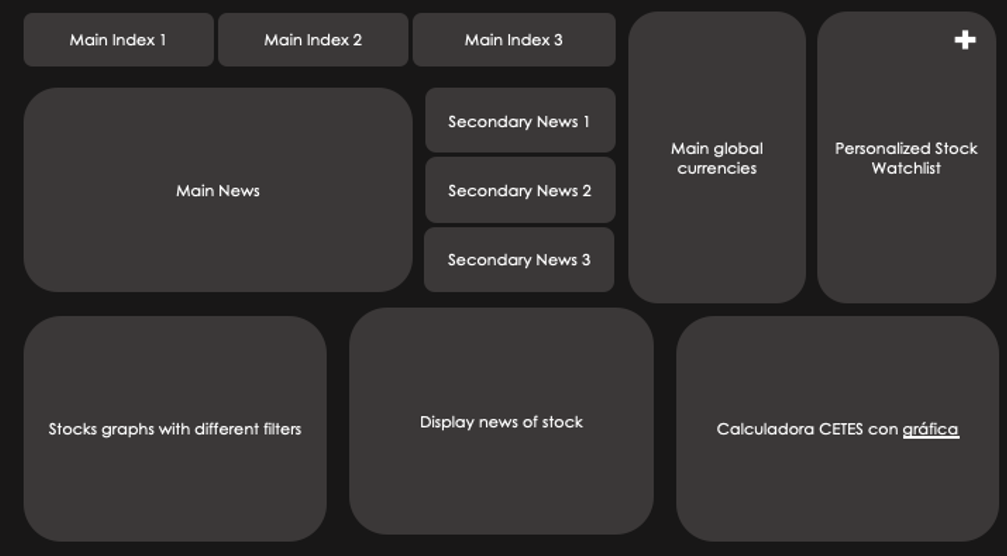

___
**`GRÁFICAS DE ACCIONES CON FILTROS`**

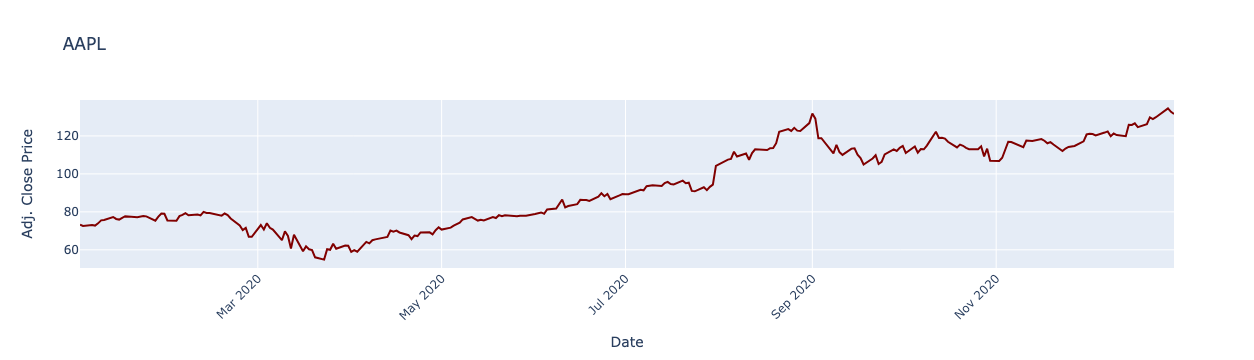

In [68]:
# Definir ticker y fechas
ticker = input('Ticker: ')
st_date = input('Fecha de inicio (AAAA-MM-DD): ')
end_date = input('Fecha de cierre (AAAA-MM-DD): ')

# Obtener los datos
data = yf.download(ticker, st_date, end_date, progress=False)

# Crear una figura de Plotly
fig = go.Figure()

# Agregar una línea de gráfica para el precio de cierre ajustado
fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', line=dict(color='maroon')))

# Configurar el título y etiquetas de los ejes
fig.update_layout(
    title=ticker,
    xaxis_title='Date',
    yaxis_title='Adj. Close Price',
    xaxis=dict(tickangle=-45)
)

___
**`NOTICIAS DE LA ACCIÓN`**

Se utiliza la biblioteca `newspaper3k` que proporciona un método para generar el resumen de un artículo dada su liga que se obtiene a través del API de *alpha vantage*. Está inspirada en la librería `requests`, herramienta para realizar peticiones a servidores web, así como interactuar con Interfaces de Programación de Aplicaciones (APIs) y extraer contenido de páginas web (*web scraping*), e impulasda por la librería `lxml`, utilizada para el procesamiento de *XML* y *HTML*, que son lenguajes utilizados para estructurar y representar información en documentos web.

El resumen que se obtiene es una versión condensada de los puntos principales y la información clave del artículo, esto se logra mediante un algoritmo que determina qué oraciones en el artículo son las más importantes o representativas, combinando técnicas de procesamiento de lenguaje natural como las longitudes de oraciones, frecuencia de palabras y posición dentro del artículo. Esto quiere decir que `newspaper3k` extrae y analiza el contenido, lo divide en frases (tokenización), elimina palabras comunes (*stopwords* en inglés) y realiza limpieza pertinente. Se puntean las frases según su importancia de acuedo a la frecuencia de las palabras, su posición y longitud. Así, se seleccionan las oraciones clave para que, al combinarlas, se obtenga un resumen.

*_TODO_*: Explicar qué algoritmo que usa Google Translate. Docs: https://cloud.google.com/translate/docs#docs

In [3]:
# Para tener las noticias en español
from googletrans import Translator
translator = Translator()

In [4]:
def translate(text):
    return translator.translate(text , dest ='es').text 

In [6]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={ticker}&time_from={st_date.replace('-', '')+'T0000'}&limit=3&sort=RELEVANCE&apikey={a_v_token}"
r = requests.get(url)
data = r.json()

In [7]:
[translate(data['feed'][i]['summary']) for i in range(5)]

['Este gigante tecnológico podría crecer mucho más.',
 'Esta historia se publicó por primera vez en el portal Benzinga India. Apple Inc. AAPL aparentemente está planeando un aumento masivo de su capacidad de producción en India.',
 'El CEO de AAPL de Apple Inc., Tim Cook, se reunió con la atleta paralímpica más condecorada de España, Teresa Perales, y discutió las aplicaciones prácticas de Apple Watch en sus esfuerzos de entrenamiento y accesibilidad.',
 'John Giannandrea, ex ejecutivo de alto rango de Alphabet Inc GOOG GOOGL Google y ahora líder de la división de inteligencia artificial AAPL de Apple Inc, destacó un cambio sutil en la reciente actualización del software del iPhone.',
 'La serie AAPL iPhone 15 de Apple Inc. tiene un nuevo fan: el ex presidente de Windows, Steven Sinofsky, quien está sorprendido de lo bueno que es el reemplazo del iPhone 15 para una computadora de escritorio tradicional.']

___
**`PRINCIPALES NOTICIAS DADO UN TEMA`**

In [8]:
# Seleccionar tema
topic = input('Tema: ')

url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&topics={topic}&limit=4&sort=RELEVANCE&apikey={a_v_token}'
r = requests.get(url)
data = r.json()

# Obtener las ligas
links = [data['feed'][i]['url'] for i in range(4)]

Tema: blockchain


In [9]:
# Librerías
from newspaper import Article
import nltk
nltk.download()                        # verificar que esté descargado

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

*Código inspirado de [towardsdatascience.com](https://towardsdatascience.com/scrape-and-summarize-news-articles-in-5-lines-of-python-code-175f0e5c7dfc) (Artem, 2019)*

In [10]:
def get_summary(link):
    # Web Scrapping 
    article = Article(link)
    article.download()
    article.parse()
    article.nlp()
    return article.summary

In [11]:
for new in range(len(links)):
    print(translate(get_summary(links[new])))
    print()

“Este no es un tipo cualquiera con una bolsa de lona” vendiendo fentanilo a la luz del día.
Martín Urista/APEl Cartel de Sinaloa ha ganado cientos de millones de dólares con el comercio de fentanilo, según el Departamento de Justicia.
Una investigación reciente de CNN investigó las actividades de las empresas químicas chinas sancionadas por Estados Unidos que anuncian ingredientes de fentanilo.
Una de las empresas, Elliptic, con sede en Londres, encontró 100 empresas químicas con sede en China promocionando fentanilo, ingredientes o equipos de fentanilo para fabricar medicamentos que aceptaban pagos en criptomonedas.
Elliptic no identificó ninguna cuenta criptográfica controlada por un cartel que enviara dinero a las empresas chinas.

Pero, ¿qué significa realmente y cómo se extrae Bitcoin?
Aproximadamente cada cuatro años, la recompensa por extraer Bitcoin se reduce a la mitad, un evento conocido (como era de esperar) como “reducción a la mitad”.
La represión de la minería de Bitcoin 

___
**`PRINCIPALES MONEDAS GLOBALES`**

In [8]:
vs_currency = 'MXN'
currencies = ['USD','AUD','JPY', 'GBP']

currency_names = []
exchange_rate = {}
bid_price = {}
ask_price ={}

for c in currencies:
    url = f"https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency={c}&to_currency={vs_currency}&apikey={a_v_token}"
    r = requests.get(url)
    data = r.json()
    data = data['Realtime Currency Exchange Rate']
    currency_names.append(f"{c}/{vs_currency}")
    exchange_rate[c] = data['5. Exchange Rate']
    bid_price[c] = data['8. Bid Price']
    ask_price[c] = data['9. Ask Price']
    
df = pd.DataFrame({
            'Moneda': currency_names,
            'Tipo de Cambio': exchange_rate.values(),
            'Compra': bid_price.values(),
            'Venta': ask_price.values()
    })
df

,Moneda,Tipo de Cambio,Compra,Venta
0,USD/MXN,17.40700000,17.40680000,17.40740000
1,AUD/MXN,11.20850000,11.20822000,11.20894000
2,JPY/MXN,0.11658000,0.11657800,0.11658200
3,GBP/MXN,21.25030000,21.24930000,21.25045000


___

**`CALCULADORA CETES`**

In [3]:
def cetes_calculator(choice, start_date, end_date):
    cetes = Cetes(choice)
    data = cetes.get_data(date_end=end_date, date_start=start_date)
    return data

def plot_cetes_data(choice, start_date, end_date):
    data = cetes_calculator(choice, start_date, end_date)
    
    # Convierte la columna "date" a tipo datetime si no está en ese formato
    data['date'] = pd.to_datetime(data['date'])
    
    # Crea la figura de la gráfica de barras
    fig = go.Figure()

    # Agrega las barras a la figura
    fig.add_trace(go.Scatter(
        x=data['date'],
        y=data['value'],
        marker_color='red'))

    # Configuración del estilo de la gráfica
    fig.update_layout(
        template='plotly_white',
        xaxis_tickangle=-45,
        xaxis_title='Fecha',
        yaxis_title='Valor',
        title=f'Gráfica de barras para Cetes {choice}')
    fig.show()

interact(plot_cetes_data, choice=['28', '91', '182', '364'], start_date='1995-01-01', end_date='2023-09-30')

interactive(children=(Dropdown(description='choice', options=('28', '91', '182', '364'), value='28'), Text(val…

<function __main__.plot_cetes_data(choice, start_date, end_date)>

___
**`LISTA PERSONALIZADA DE STOCKS`**

In [8]:
def personalized_df(personalized_ticker_list=['IBM', 'TSLA', 'AAPL', 'PLTR']):
    open = {}
    high = {}
    low = {}
    price = {}
    volume = {}
    previous_close = {}
    change = {}
    change_percent = {}

    for t in personalized_ticker_list:
        url = f'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={t}&apikey={a_v_token}'
        r = requests.get(url)
        data = r.json()
        data = data['Global Quote']
        open[t] = data['02. open']
        high[t] = data['03. high']
        low[t] = data['04. low']
        price[t] = data['05. price']
        volume[t] = data['06. volume']
        previous_close[t] = data['08. previous close']
        change[t] = data['09. change']
        change_percent[t] = data['10. change percent']

    df = pd.DataFrame({
                'Ticker': personalized_ticker_list,
                'Apertura': open.values(),
                'Alta': high.values(),
                'Baja': low.values(),
                'Precio': price.values(),
                'Volumen': volume.values(),
                'Precio al Ultimo Cierre': previous_close.values(),
                'Cambio': change.values(),
                'Porcentaje de Cambio': change_percent.values()
        })
    possible_choices = [col for col in df.columns if col != 'Ticker' and col != 'Porcentaje de Cambio']
    df[possible_choices] = df[possible_choices].astype(float)
    df['Porcentaje de Cambio'] = df['Porcentaje de Cambio'].str[:-1].astype(float)
    return df

# TODO: Add time series of one year. Only leave ticker, price and percentage of change.

In [67]:
def personalized_df(ticker):

    # Obtener la fecha de hoy
    today = datetime.now()
    # Calcular la fecha de hace un año
    last_year = today - timedelta(days=365)
    # Formatear las fechas como cadenas de texto
    today_str = today.strftime("%Y-%m-%d")
    last_year_str = last_year.strftime("%Y-%m-%d")
    
    # Descargamos la info del ticker
    df = yf.Ticker(ticker).history(start=last_year_str, end=today_str)
    # Desplazamos el valor con el que cerró para calcular el cambio
    df["prevClose"] = df.Close.shift(1)
    # Asignamos a la variable change el cambio porcentual
    df['Change'] = df[['Open','prevClose']].pct_change(axis=1)["prevClose"]
    # Nos quedamos unicamente con el valor que cerró y con el cambio.
    df = df[["Close", "Change"]]
    return df

def plot_personalized(ticker):
    data = personalized_df(ticker)
    fig = px.line(data, x=data.index, y=["Close"], labels={"index": "Fecha"})
    fig.update_layout(title=f"Serie de tiempo de {ticker}",
                    xaxis_title="Fecha",
                    yaxis_title="Cierre")

    fig.show()

interact(plot_personalized, ticker=["AAPL", "TSLA", "IBM", "PLTR"])


interactive(children=(Dropdown(description='ticker', options=('AAPL', 'TSLA', 'IBM', 'PLTR'), value='AAPL'), O…

<function __main__.plot_personalized(ticker)>

___
**`PRINCIPALES INDICES (YTD)`**

In [66]:
from datetime import datetime

ticker1 = '^GSPC'
ticker1_title = 'S&P 500 (^GSPC)'
ticker2 = '^DJI'
ticker2_title = 'DOW JONES (^DJI)'
ticker3 = '^MXX'
ticker3_title = 'Índice de Precios y Cotizaciones (^MXX)'
st_date = datetime(datetime.now().year, 1, 1)
end_date = datetime.now()

# Obtener los datos
data1 = yf.download(ticker1, st_date, end_date, progress=False)
data2 = yf.download(ticker2, st_date, end_date, progress=False)
data3 = yf.download(ticker3, st_date, end_date, progress=False)

# Graficar
from plotly.subplots import make_subplots

# Crear subplots con 3 gráficos de líneas
fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    subplot_titles=[ticker1_title, ticker2_title, ticker3_title])

# Agregar las tres líneas a los subplots
fig.add_trace(go.Scatter(x=data1.index, y=data1['Adj Close'], line=dict(color='#B00C0C'), name=ticker1_title), row=1, col=1)
fig.add_trace(go.Scatter(x=data2.index, y=data2['Adj Close'], line=dict(color='#10815C'), name=ticker2_title), row=2, col=1)
fig.add_trace(go.Scatter(x=data3.index, y=data3['Adj Close'], line=dict(color='#9E1A70'), name=ticker3_title), row=3, col=1)

# Configurar el diseño de los subplots
fig.update_layout(
    title="Gráfico de series de tiempo en subplots",
    xaxis_title="Fecha",
    yaxis_title="Precio",
    xaxis=dict(tickangle=45),
    template="plotly" 
)

# Mostrar el gráfico
fig.show()